In [3]:
####################################################################
##################### IMPORTING REQUIRED MODULES ###################

import os.path
import os, sys
import numpy as np
import rampy as rp
from scipy.optimize import leastsq # Levenberg-Marquadt Algorithm #
import scipy
from matplotlib import gridspec
import fnmatch
from scipy import interpolate
import matplotlib.pyplot as plt
import lmfit
from lmfit import Parameters, minimize, fit_report
from scipy import stats

%matplotlib inline

In [4]:
####################################################################
########################## SET PARAMETERS ############################

file_baseg = 'g ('
file_base2d = '2d ('
file_base = 'flake ('
file_suffix = ').txt'
fig_suffix = ').png'

first_file = 1
numberoffiles = len(fnmatch.filter(os.listdir('.'), 'g*.txt'))+1

#depends on your measurement ratio between G and 2D peak:
counts_ratio = 2

In [5]:
####################################################################
######################### DEFINING FUNCTIONS #######################

def lorentzian(x, a, f, l, y0=0): # [hwhm, peak center, intensity, y0] #
    numerator =  (0.5*l)**2
    denominator = ( x - (f) )**2 + (0.5*l)**2
    y = a*(numerator/denominator)+y0
    return y

def residual(pars, x, data=None, eps=None):
    # unpack parameters:
    #  extract .value attribute for each parameter
    # a - amplitude; f - freaquency, l - FWHM?
    a1 = pars['a1'].value
    a2 = pars['a2'].value
    a3 = pars['a3'].value

    
    f1 = pars['f1'].value
    f2 = pars['f2'].value
    f3 = pars['f3'].value
    
    
    l1 = pars['l1'].value
    l2 = pars['l2'].value
    l3 = pars['l3'].value

    
    # lorentzian model
    
    peak1 = lorentzian(x,a1,f1,l1)
    peak2 = lorentzian(x,a2,f2,l2)
    peak3 = lorentzian(x,a3,f3,l3)
  
    
    model = peak1 + peak2 + peak3 
    
    if data is None:
        return model, peak1, peak2, peak3
    if eps is None:
        return (model - data)
    return (model - data)/eps


def residual_2D(pars, x, data=None, eps=None):
    # unpack parameters:
    #  extract .value attribute for each parameter
    # a - amplitude; f - freaquency, l - FWHM?
    a1 = pars['a1'].value
    a2 = pars['a2'].value
        
    f1 = pars['f1'].value
    f2 = pars['f2'].value
   
    l1 = pars['l1'].value
    l2 = pars['l2'].value

    
    # lorentzian model
    
    peak1 = lorentzian(x,a1,f1,l1)
    peak2 = lorentzian(x,a2,f2,l2)
  
    
    model = peak1 + peak2
    
    if data is None:
        return model, peak1, peak2
    if eps is None:
        return (model - data)
    return (model - data)/eps


/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )
/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )
/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )


Full Raman spectrum from flake 1


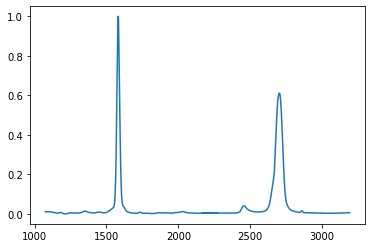

D and G peaks fitting from flake 1


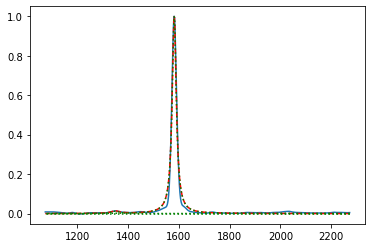

0.9855687787815293
2D and D+D' peaks fitting from flake 1


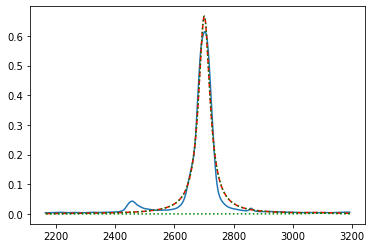

Evaluation of the LO+ZO' baseline substraction from flake 1


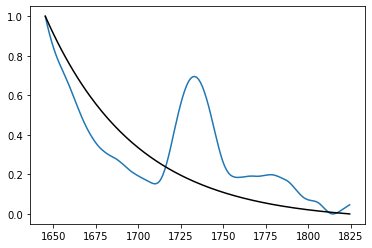

LO+ZO' peaks fitting for flake 1


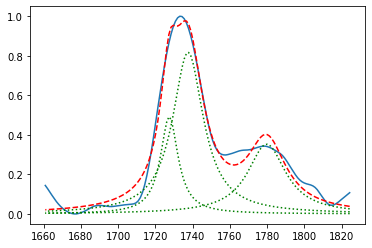

/home/vaiva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:290: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )
/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )
/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )


Full Raman spectrum from flake 2


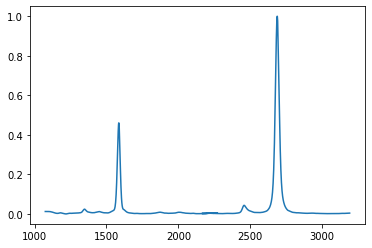

D and G peaks fitting from flake 2


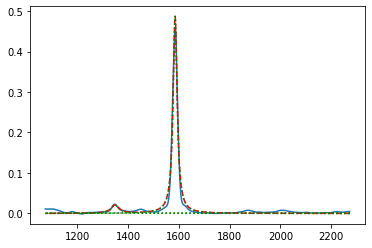

0.9850298604921607
2D and D+D' peaks fitting from flake 2


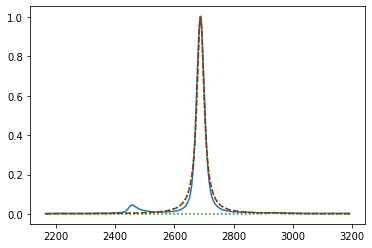

Evaluation of the LO+ZO' baseline substraction from flake 2


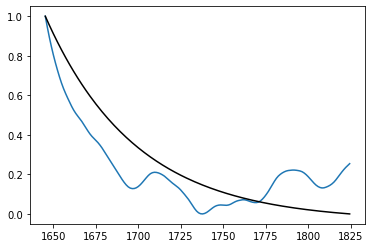

LO+ZO' peaks fitting for flake 2


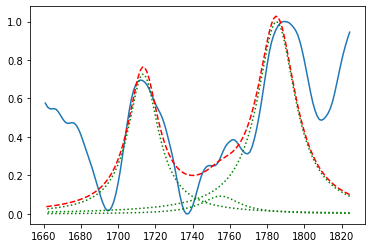

/home/vaiva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:290: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )
/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )
/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )


Full Raman spectrum from flake 3


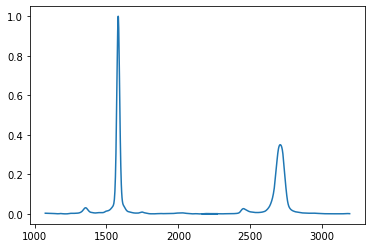

D and G peaks fitting from flake 3


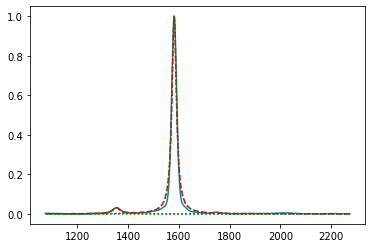

0.9892339595230689
2D and D+D' peaks fitting from flake 3


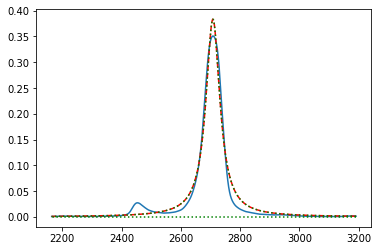

Evaluation of the LO+ZO' baseline substraction from flake 3


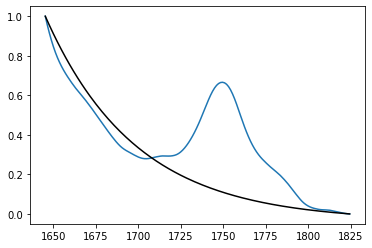

LO+ZO' peaks fitting for flake 3


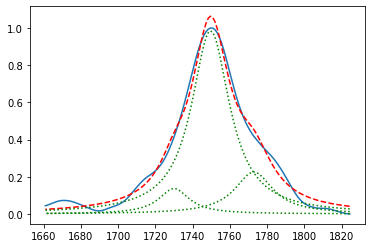

/home/vaiva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:290: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )
/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )
/home/vaiva/.local/lib/python3.6/site-packages/rampy/baseline.py:239: RuntimeWarning: overflow encountered in exp
  wt = 1.0/(1 + np.exp( 2* (d-(2*s-m))/s ) )


Full Raman spectrum from flake 4


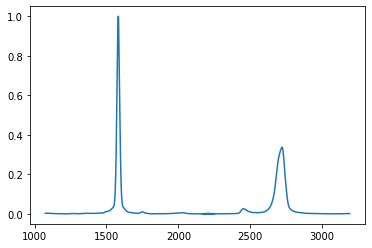

D and G peaks fitting from flake 4


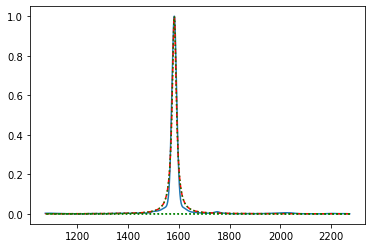

0.9866151964635689
2D and D+D' peaks fitting from flake 4


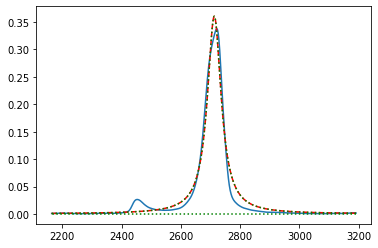

Evaluation of the LO+ZO' baseline substraction from flake 4


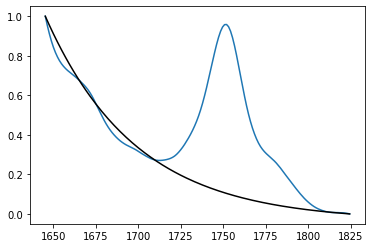

LO+ZO' peaks fitting for flake 4


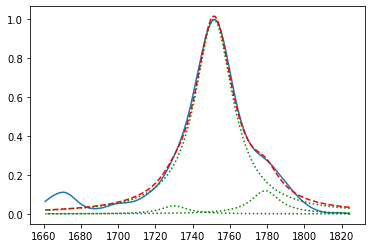

/home/vaiva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:290: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


In [11]:
####################################################################
########################## LOADING DATA ############################
#initial arrays
SLG = 0
rFLG = 0
FLG = 0
Graphite = 0
allinallLOZO=[]
allinall=[]

for e in range(first_file, numberoffiles):

    # generate corresponding full file name
    full_fnameg = file_baseg + str(e) + file_suffix
    full_fname2d = file_base2d + str(e) + file_suffix

    if not (os.path.exists(full_fnameg) and os.path.exists(full_fname2d)):
        print ("no such file %s " % full_fnameg, full_fname2d)
        e =+ 1
    else:
        # read that file into an array
        filedatag = np.genfromtxt(full_fnameg, comments='#', delimiter='\t')
        filedata2d = np.genfromtxt(full_fname2d, comments='#', delimiter='\t')


        ####################################################################
        ########################## D, G, 2D peak fitting ############################

        #load data
        xg = filedatag[:,0]
        yg = filedatag[:,1]
        x2d = filedata2d[:,0]
        y2d = filedata2d[:,1]/counts_ratio
        
        #smooth
        yg = rp.smooth(xg,yg,method="whittaker",Lambda=300)
        y2d = rp.smooth(x2d,y2d,method="whittaker",Lambda=300)
        
        
        #remove background
            #g peak
        bir = np.array([(min(xg),1030),(1900,max(xg))])
        yg_cor, background = rp.baseline(xg,yg,bir,"arPLS",lam=10**8)
        yg = yg_cor[:,0]
        
            #2d peak
        bir = np.array([(min(x2d),2550),(3100,max(x2d))])
        y2d_cor, background = rp.baseline(x2d,y2d,bir,"arPLS",lam=10**8)
        y2d = y2d_cor[:,0]        
        
        #fix spectrum
        y = np.concatenate((y2d,yg))
        x = np.concatenate((x2d,xg))
        
                
        bir = np.array([(min(x),1050.),(1880.,2300.), (2400.,2500),(3050.,max(x))])
        y, background = rp.baseline(x,y,bir,"arPLS",lam=10**8)
        y = y[:,0]
              
        #normalise
        yg = (yg-min(y))/(max(y)-min(y))
        y2d = (y2d-min(y))/(max(y)-min(y))
        y = rp.normalise(y,method="minmax")
        
        print('Full Raman spectrum from flake %d' % e)
        plt.figure()
        plt.plot(x,y)
        plt.show()
        

        #g peak fitting
        
        params = lmfit.Parameters()
#                       (Name,  Value,  Vary,   Min,  Max,  Expr)
        params.add_many(('a1',   0.5,   True,  0,      1,  None),
                        ('f1',   1350,   True, 1330,   1370,  None),
                        ('l1',   40,   True,  0,      150,  None),
                        ('a2',  1,   True,  0.3,     1,  None),
                        ('f2',   1580,   True, 1550,   1600,  None),
                        ('l2',   20,   True,  0,   80,  None),
                        ('a3',   0.5,   True,  0,     0.7,  None),
                        ('f3',   1615,   True,  1600,     1625,  None),
                        ('l3',   30,   True,  0.05,     80,  'l1*0.35'))
    
        result = lmfit.minimize(residual, params, method = 'least_squares', args=(xg, yg))         
        modelg = lmfit.fit_report(result.params)
        youtg, peakg1,peakg2, peakg3 = residual(result.params,xg) # the different peaks
        
        print('D and G peaks fitting from flake %d' % e)
        plt.figure()
        plt.plot(xg,yg, xg,youtg,'r--', xg,peakg1,'g:', xg,peakg2,'g:', xg,peakg3,'g:',)
        plt.show()
        
        
        #save results in a list
        slope, intercept, r_value, p_value, std_err = stats.linregress(yg, youtg)
        rg = r_value**2
        print(rg)
        
        if rg > 0.95:
            best_para = [e]
            for name in result.params.valuesdict():
                best_para=best_para+[result.params[name].value]


            #2D peak fitting
            params = lmfit.Parameters()
        #               (Name,  Value,  Vary,   Min,  Max,  Expr)
            params.add_many(('a1',  0.5,   True,  0,     1,  None),
                            ('f1',   2690,   True, 2650,   2720,  None),
                            ('l1',   50,   True,  0,   180,  None),
                            ('a2',  0.2,   True,  0,     1,  None),
                            ('f2',   2940,   True, 2900,   3100,  None),
                            ('l2',   40,   True,  0,   180,  None))

            result = lmfit.minimize(residual_2D, params, method = 'leastsq', args=(x2d, y2d))         
            model2d = lmfit.fit_report(result.params)
            yout2d, peak2d1,peak2d2 = residual_2D(result.params,x2d) # the different peaks
            
            print("2D and D+D' peaks fitting from flake %d" % e)
            plt.figure()
            plt.plot(x2d,y2d, x2d,yout2d,'r--', x2d,peak2d1,'g:', x2d,peak2d2,'g:')
            plt.show()

            #save results in a list
            for name in result.params.valuesdict():
                best_para=best_para+[result.params[name].value]

        ######################## LOZO peak analysis ############################

            #slice
            xLOZO1 = xg[np.where((xg > 1645)&(xg < 1825))]
            yLOZO1 = yg[np.where((xg > 1645)&(xg < 1825))]


            #normalise
            yLOZO1 = rp.normalise(yLOZO1,method="minmax")
            
            #shif to match background curve
            yLOZO1 = yLOZO1 + 1-yLOZO1[-1]



            ##background correction and evaluation##
            background = rp.normalise((3.11078e13)*np.exp(-xLOZO1/53.13168)-0.02283,method="minmax")
            slope, intercept, r_value, p_value, std_err = stats.linregress(yLOZO1, background)
            r_background = r_value**2
            
            yLOZO2 = yLOZO1 - background

            print("Evaluation of the LO+ZO' baseline substraction from flake %d" % e)
            plt.figure()
            plt.plot(xLOZO1,yLOZO1,xLOZO1,background, 'k')
            plt.show()
            
            #evening out the area around LO+ZO' peaks
            bir = np.array([(min(xLOZO1),1675),(1695,1705),(1795,1805),(1825,max(xLOZO1))])
            yLOZO_corrected, background = rp.baseline(xLOZO1,yLOZO2,bir,"poly", polynomial_order = 1)
            yLOZO_corrected, background = rp.baseline(xLOZO1,yLOZO_corrected[:,0],bir,"poly", polynomial_order = 1)
            yLOZO_2 = yLOZO_corrected[:,0]

            ##fitting LOZO##

            # signal selection
            lb = 1660 # The lower boundary of interest
            hb = 1850 # The upper boundary of interest
            x_fit = xLOZO1[np.where((xLOZO1 > lb)&(xLOZO1 < hb))]
            y_fit = yLOZO_2[np.where((xLOZO1 > lb)&(xLOZO1 < hb))]
            y_fit = rp.normalise(y_fit,method="minmax")


            params = lmfit.Parameters()
        #               (Name,  Value,  Vary,   Min,  Max,  Expr)
            params.add_many(('a1',  0.5,   True,  0,     1,  None),
                            ('f1',   1715,   True, 1705,   1730,  None),
                            ('l1',   10,   True,  5,   20,  None),
                            ('a2',  0.5,   True,  0,     1,  None),
                            ('f2',   1740,   True, 1735,   1755,  None),
                            ('l2',   10,   True,  5,   25,  None),
                            ('a3',  0.3,   True,  0,     1,  None),
                            ('f3',   1775,   True, 1770,   1785,  None),
                            ('l3',   10,   True,  5,   25,  None))

            result = lmfit.minimize(residual, params, method ='least_squares',
                                    args=(x_fit, y_fit)) # fit data with  nelder model from scipy

            model = lmfit.fit_report(result.params)
            yout, peak1, peak2, peak3 = residual(result.params,x_fit) # the different peaks
            
            print("LO+ZO' peaks fitting for flake %d" % e)
            plt.figure()
            plt.plot(x_fit,y_fit, x_fit,yout,'r--', x_fit,peak1,'g:', x_fit,peak2,'g:', x_fit,peak3,'g:',)
            plt.show()

            #saving fitting parameters in a list
            best_paraLOZO = []

            for name in result.params.valuesdict():
                best_paraLOZO=best_paraLOZO+[result.params[name].value]


           ##thickness analysis##

            #R^2 value
            slope, intercept, r_value, p_value, std_err = stats.linregress(y2d, yout2d)
            r = r_value**2
            best_para += [r]


            slope, intercept, r_value, p_value, std_err = stats.linregress(y_fit, yout)
            rLOZO = r_value**2
            best_paraLOZO += [rLOZO]

            if (((best_paraLOZO[0] < 0.6) and (best_paraLOZO[3] < 0.6)
                and (best_paraLOZO[6] < 0.6)) or
                (rLOZO < 0.7 and r_background > 0.7 and r > 0.985)):
                ind_LOZO = ['SLG']
            elif ((best_paraLOZO[0] >= 0.2) and ((best_paraLOZO[1] <= 1728.5)
                                                  and (best_paraLOZO[1] > 1715))
                  and (best_paraLOZO[4] <= 1742)):
                ind_LOZO = ['2-3 LG']
            elif ((best_paraLOZO[0] > 0.1) and (best_paraLOZO[1] > 1726)
                  and (best_paraLOZO[4] <= 1750) and rLOZO > 0.9):
                ind_LOZO = ['3-5 LG']
            elif ((best_paraLOZO[0] <= 0.5)
                  and ((best_paraLOZO[1] < 1725) or (best_paraLOZO[6] < 0.2))
                  and (best_paraLOZO[4] >= 1745) and (best_paraLOZO[4] <= 1752)
                  and r_background < 0.75):
                ind_LOZO = ['>= 5 LG']
            else:
                ind_LOZO = ['unknown']

            best_paraLOZO += ind_LOZO




        #     #LPE analysis

            if (r >= 0.989):
                ind_2d = ['SLG']
                SLG += 1
            elif (0.989 > r) & (r >= 0.985):
                ind_2d = ['rFLG']
                rFLG += 1
            elif (0.985 > r) & (r >= 0.97):
                ind_2d = ['FLG']
                FLG += 1
            elif (0.97 > r):
                ind_2d = ['Graphite']
                Graphite += 1

            best_para += ind_2d 
            best_paraLOZO += [r_background]



            #saving fitting parameters
            allinall.append(best_para+best_paraLOZO) #get values and sandart derivation


                ############################## PLOTTING FULL RAMAN ############################
            fig10 = plt.figure(constrained_layout=True)
            gs0 = fig10.add_gridspec(1, 2)#, width_ratios=[3, 2]

            ax0 = plt.subplot(gs0[0])
            ax0.plot(x2d, y2d,'k', lw=2)
            ax0.plot(x2d, yout2d, 'r--', lw=1)
            plt.title('R\u00b2(2D)=%0.3f %s' %(r, ind_2d), loc='right')
            #ax0.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
            plt.xlabel(r'$\omega$ (cm$^{-1}$)', fontsize=10)  ## set x label ##
            plt.ylabel('Intensity (arb.units)', fontsize=10)
            ax0.grid(True, which='major', ls='-', alpha=0.1)  ## set major gridlines ##

            gs00 = gs0[1].subgridspec(2, 1)
            ax1 = plt.subplot(gs00[0])
            ax1.plot(xLOZO1, yLOZO1, "k", lw=2)
            plt.title("LO+ZO'=%s" % ind_LOZO, loc='right')
            plt.ylabel('Intensity (arb.units)', fontsize=10)
            ax1.grid(True, which='major', ls='-', alpha=0.1)  ## set major gridlines ##
            #ax1.legend(loc='best')  ## set legend ##

            ax2 = plt.subplot(gs00[1])
            ax2.plot(x_fit, y_fit,'k', x_fit, yout, 'r--', x_fit, peak1, 'g:',x_fit, peak2, 'g:',
                      x_fit, peak3, 'g:')
            ax2.grid(True, which='major', ls='-', alpha=0.1)  ## set major gridlines ##
            plt.xlabel(r'$\omega$ (cm$^{-1}$)', fontsize=10)  ## set x label ##
            plt.ylabel('Intensity (arb.units)', fontsize=10)  ## set y label ##

            plt.tight_layout()
            plt.savefig('result(' + str(e) + fig_suffix, format='png', dpi=300) # save the figure to file
            plt.close() 
            ####################################################################
            ############################## SAVING FILES ###########################

            #saving normalised spectra of LO+ZO' spectrum part
#             spectrum = np.array((x_fit, y_fit)).T
#             np.savetxt('spectrumLOZO ('+str(e)+file_suffix, spectrum,fmt='%f', delimiter='\t', newline='\n')
        
        else:
            print('Fitting is not suitble, moving to the next flake.')


In [12]:
print('Single layer flakes: %i' % SLG)
print('Restacked few layer flakes: %i' % rFLG)
print('Few layer flakes: %i' % FLG)
print('Graphite flakes: %i' % Graphite)

np.savetxt('allinall.csv', allinall, fmt = '%s', delimiter=',', newline='\n', 
           header = 'Flake,D_Intensity,D_Position,D_FWHM,G_Intensity,G_Position,G_FWHM,'+
           'D\'_Intensity,D\'_Position,D\'_FWHM,2D_Intensity,2D_Position,2D_FWHM,2D\'_Intensity,'+
           '2D\'_Position,2D\'_FWHM,R^2,Thickness_R2,'+'Intensity1,Position1,FWHM1,Intensity2,Position2,FWHM2,'+
           'Intensity3,Position3,FWHM3,R2_LOZO,Thickness_LOZO,Background_R2')


Single layer flakes: 1
Restacked few layer flakes: 0
Few layer flakes: 3
Graphite flakes: 0
